In [1]:
from generators.rule30_gen.rule30 import Rule30Generator
from tests.nist_tests import NIST_tester
from tests.visualization import TestVisualizer

In [2]:
rule_30_gen = Rule30Generator()
bytes = rule_30_gen.generate_bytes(128)
tester = NIST_tester()
results = tester.run_battery_tests(bytes)
stat_res = tester.run_statistic_tests(rule_30_gen)

In [3]:
visualizer = TestVisualizer(stat_res)

In [4]:
names, passed, scores, eligible = visualizer._get_grouped_stats()

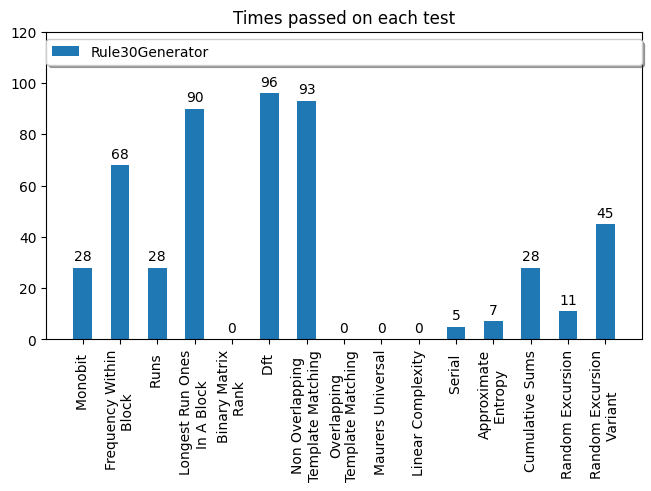

In [5]:
visualizer.show_compared_stats("passed")

In [6]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox

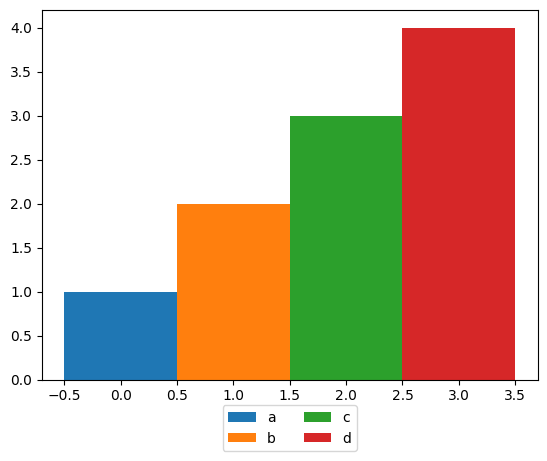

In [7]:
categs = ["a", "b", "c", "d"]
dados = [1, 2, 3, 4]
fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(categs)):
    ax.bar(i, dados[i], width=1, label=categs[i])
legend = ax.legend(loc="upper center", ncols=2)
leg_bbox = legend.get_window_extent()
leg_bbox_pts = leg_bbox.get_points()
leg_height = leg_bbox_pts[1][1] - leg_bbox_pts[0][1]
new_bbox = Bbox(
    [
        [leg_bbox_pts[0][0], 0],
        [leg_bbox_pts[1][0], leg_height]
    ]
)
legend.remove()
new_legend = ax.legend(loc="upper center", ncols=2, bbox_to_anchor=(0.5, -0.05))
plt.show()

In [8]:
bbox = legend.get_window_extent()
bbox

AttributeError: 'NoneType' object has no attribute '_get_renderer'

In [ ]:
plt.rcParams["ytick.minor.size"]

2.0

In [ ]:
help(bbox)

Help on Bbox in module matplotlib.transforms object:

class Bbox(BboxBase)
 |  Bbox(points, **kwargs)
 |
 |  A mutable bounding box.
 |
 |  Examples
 |  --------
 |  **Create from known bounds**
 |
 |  The default constructor takes the boundary "points" ``[[xmin, ymin],
 |  [xmax, ymax]]``.
 |
 |      >>> Bbox([[1, 1], [3, 7]])
 |      Bbox([[1.0, 1.0], [3.0, 7.0]])
 |
 |  Alternatively, a Bbox can be created from the flattened points array, the
 |  so-called "extents" ``(xmin, ymin, xmax, ymax)``
 |
 |      >>> Bbox.from_extents(1, 1, 3, 7)
 |      Bbox([[1.0, 1.0], [3.0, 7.0]])
 |
 |  or from the "bounds" ``(xmin, ymin, width, height)``.
 |
 |      >>> Bbox.from_bounds(1, 1, 2, 6)
 |      Bbox([[1.0, 1.0], [3.0, 7.0]])
 |
 |  **Create from collections of points**
 |
 |  The "empty" object for accumulating Bboxs is the null bbox, which is a
 |  stand-in for the empty set.
 |
 |      >>> Bbox.null()
 |      Bbox([[inf, inf], [-inf, -inf]])
 |
 |  Adding points to the null bbox will giv

: 

: 

: 

: 

: 

: 